In [1]:
import pandas as pd

In [2]:
imgatt = pd.read_csv("CUB_200_2011/attributes/image_attribute_labels.txt",sep='\s+',header=None, on_bad_lines='skip',usecols=[0,1,2],names=['imgid','attid','present'])

In [3]:
imgatt.head()

imgid  attid  present
0      1      1        0
1      1      2        0
2      1      3        0
3      1      4        0
4      1      5        1

In [4]:
imgatt.shape

(3677856, 3)

In [5]:
imgatt2= imgatt.pivot(index='imgid',columns='attid',values='present')

In [6]:
imgatt2.head()

attid  1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
1        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
5        0    0    0    0    1    0    0    0    0    0  ...    0    0    1   

attid  306  307  308  309  310  311  312  
imgid                                     
1        0    0    1    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    1    0    0    1    0  
4        1    0    0    1    0    0    0  
5        0    0    0    0    0    0    0  

[5 rows x 312 columns]

In [7]:
imgatt2.shape

(11788, 312)

In [8]:
imglabels = pd.read_csv("CUB_200_2011/image_class_labels.txt", sep=' ', header=None, names=['imgid','label'])

imglabels = imglabels.set_index('imgid')

In [9]:
imglabels.head()

label
imgid       
1          1
2          1
3          1
4          1
5          1

In [10]:
imglabels.shape

(11788, 1)

In [11]:
df = imgatt2.join(imglabels)
df = df.sample(frac=1)

In [12]:
df_att = df.iloc[:,:312]
df_label = df.iloc[:,312:]

In [13]:
df_att.head()

1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
1857     0    0    0    0    1    0    0    0    0    0  ...    0    0    1   
5585     0    0    0    0    0    0    1    0    0    0  ...    0    0    1   
11626    0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
8120     0    0    0    0    0    0    1    0    0    0  ...    0    0    0   
5718     0    0    0    0    0    0    1    0    0    0  ...    0    0    1   

       306  307  308  309  310  311  312  
imgid                                     
1857     0    0    0    1    0    0    0  
5585     0    0    0    0    0    1    0  
11626    0    0    1    0    0    1    0  
8120     0    1    0    0    0    1    0  
5718     0    0    0    0    0    1    0  

[5 rows x 312 columns]

In [14]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features=50,random_state=0,n_estimators=100)

In [16]:
clf.fit(df_train_att, df_train_label)

RandomForestClassifier(max_features=50, random_state=0)

In [17]:
print(clf.predict(df_train_att.head()))

[ 33  96 198 139  98]


In [18]:
clf.score(df_test_att,df_test_label)

0.4313621964097149

In [19]:
from sklearn.metrics import confusion_matrix

pred_labels = clf.predict(df_test_att)
cm = confusion_matrix(df_test_label,pred_labels)

Text(0.5, 0, 'predicted labels')

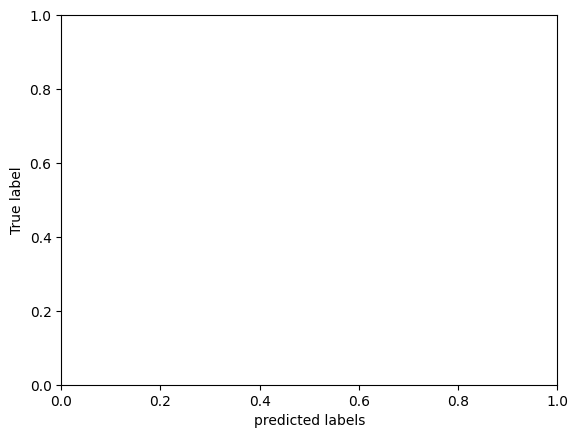

In [20]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matirx")
    else:
        print("Confusion without normalization")
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)

    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted labels')


In [21]:
birds =pd.read_csv("CUB_200_2011/classes.txt", sep='\s+', header=None, usecols=[1], names=['birdname'])

birds = birds['birdname']
birds

0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

In [22]:
import numpy as np

np.set_printoptions(precision=2)
plt.figure(figsize=(60,60), dpi=300)
plot_confusion_matrix(cm, classes=birds, normalize=True)

#plt.show()


Normalized confusion matirx
[[0.25 0.   0.2  ... 0.   0.   0.  ]
 [0.05 0.65 0.   ... 0.   0.05 0.  ]
 [0.06 0.06 0.41 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.16 0.   0.  ]
 [0.   0.   0.   ... 0.05 0.4  0.  ]
 [0.   0.   0.   ... 0.   0.   0.83]]


In [23]:
from sklearn import tree

clftree = tree.DecisionTreeClassifier()

clftree.fit(df_train_att, df_train_label)

clftree.score(df_test_att, df_test_label)

0.26399155227032733

In [24]:
from sklearn import svm

clfsvm = svm.SVC()
clfsvm.fit(df_train_att,df_train_label)
clfsvm.score(df_test_att,df_test_label)

0.47914466737064415

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)

print("Accuracy : %0.3f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

Accuracy : 0.445 (+/- 0.03)


In [26]:
scorestree = cross_val_score(clftree, df_train_att, df_train_label, cv=5)

print("Accuracy : %0.3f (+/- %0.2f)" % (scorestree.mean(),scorestree.std()*2))

Accuracy : 0.263 (+/- 0.02)


In [27]:
scoressvm = cross_val_score(clfsvm, df_train_att, df_train_label, cv=5)

print("Accuracy : %0.3f (+/- %0.2f)" % (scoressvm.mean(),scoressvm.std()*2))

Accuracy : 0.467 (+/- 0.03)


In [28]:
max_features_opts = range(5,50,5)

n_estimators_opts = range(10,200,20)

rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts),4), float)

i=0

for max_features in max_features_opts:
    for n_estimators in n_estimators_opts:
        clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)

        scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)

        rf_params[i,0] = max_features
        rf_params[i,1] = n_estimators
        rf_params[i,2] = scores.mean()
        rf_params[i,3] = scores.std() * 2

        i+=1

        print("Max features: %d, num estimators: %d, accuracy: %0.2f (+/- %0.2f)" % (max_features, n_estimators, scores.mean(), scores.std()*2))

Max features: 5, num estimators: 10, accuracy: 0.26 (+/- 0.03)
Max features: 5, num estimators: 30, accuracy: 0.35 (+/- 0.03)
Max features: 5, num estimators: 50, accuracy: 0.40 (+/- 0.02)
Max features: 5, num estimators: 70, accuracy: 0.41 (+/- 0.03)
Max features: 5, num estimators: 90, accuracy: 0.42 (+/- 0.02)
Max features: 5, num estimators: 110, accuracy: 0.43 (+/- 0.03)
Max features: 5, num estimators: 130, accuracy: 0.43 (+/- 0.03)
Max features: 5, num estimators: 150, accuracy: 0.44 (+/- 0.03)
Max features: 5, num estimators: 170, accuracy: 0.44 (+/- 0.02)
Max features: 5, num estimators: 190, accuracy: 0.45 (+/- 0.02)
Max features: 10, num estimators: 10, accuracy: 0.29 (+/- 0.02)
Max features: 10, num estimators: 30, accuracy: 0.38 (+/- 0.02)
Max features: 10, num estimators: 50, accuracy: 0.41 (+/- 0.02)
Max features: 10, num estimators: 70, accuracy: 0.43 (+/- 0.03)
Max features: 10, num estimators: 90, accuracy: 0.44 (+/- 0.03)
Max features: 10, num estimators: 110, accura

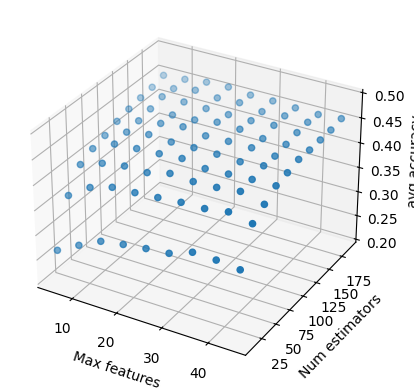

In [35]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm

fig = plt.figure()
fig.clf()

ax = fig.add_subplot(projection='3d') // this is new line, old line from book is depricated.
x = rf_params[:,0]
y = rf_params[:,1]
z = rf_params[:,2]
ax.scatter(x,y,z)
ax.set_zlim(0.2, 0.5)

ax.set_xlabel('Max features')
ax.set_ylabel('Num estimators')
ax.set_zlabel('avg accuracy')

plt.show()